# Compression Using Principal Component Analysis
In this exercise, I will compress an open source image using sklearn's pca function and see the results. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[ 1.16140056e+02, -4.49914956e+02,  3.30065806e+02, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.06869070e+02,  5.58553801e+02,  3.33387856e+02, ...,
         2.45414917e-13,  6.40323807e-13,  1.47391140e-14],
       [ 5.34236238e+02,  2.27262993e+02,  1.44344778e+02, ...,
         2.53887557e-13,  5.10510542e-13,  5.36540415e-14],
       ...,
       [-5.97870538e+02, -4.25978696e+02, -3.22461591e+02, ...,
         1.81606881e-15,  1.35129131e-15,  9.10719465e-18],
       [-1.16404914e+02,  7.81506697e+02,  5.96166267e+02, ...,
        -8.25966737e-16, -1.29325146e-16,  5.99782179e-16],
       [ 1.29695522e+02,  9.81980789e+02, -9.31674242e+01, ...,
         5.22000294e-15, -1.35573307e-15, -4.93211397e-16]])

In [8]:
len(X_train.columns)

784

Find the number of dimensions that keep 95% variance, to make a point later on. 

In [9]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [10]:
d

154

The _n\_components_ of pcs is overloaded and if we give 0.95 as the parameter is does the same work as giving the desired d.

In [11]:
pca = PCA(n_components=.95)   # using 95% as the paramenter
X_reduced=pca.fit_transform(X_train)
pca.n_components_

154

In [12]:
pca = PCA(n_components=154) # using 154 as parameter
X_reduced=pca.fit_transform(X_train)
pca.explained_variance_ratio_.sum()

0.9501032066034933

In [13]:
X_recovered = pca.inverse_transform(X_reduced)

In [14]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

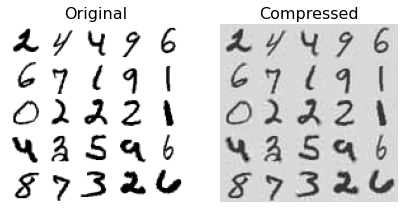

In [15]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
temp=pd.DataFrame(X_train[::2100]).to_numpy()
plot_digits(temp)
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf_clf=RandomForestClassifier(random_state=42)

In [26]:
y_train_1=y_train==1
y_test_1=y_test==1

In [29]:
import time
from sklearn.metrics import precision_score,accuracy_score

In [31]:
s=time.time()
rf_clf.fit(X_train,y_train_1)
y_pred=rf_clf.predict(X_test)
e=time.time()
print(e-s)
accuracy_score(y_test_1, y_pred)

12.199182987213135


0.9958285714285714

In [33]:
X_test_reduced=pca.fit_transform(X_test)

In [34]:
s=time.time()
rf_clf.fit(X_reduced,y_train_1)
y_pred=rf_clf.predict(X_test_reduced)
e=time.time()
print(e-s)
accuracy_score(y_test_1, y_pred)

45.428658962249756


0.8914285714285715

As expected the accuracy is lower with X_reduced. 

Counterintuitively though, it seems that X_reduced takes longer time to train. So reducing dimensionality does not always help with saving time or complexity. This is one instance where it doesn't. 

